# Lab24

In [79]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import imageio.v3 as imageio
import numpy as np
from tensorflow import keras

## 3.
Pakeisti modelių hiperparametrus, optimizavimo funkcijas, tinklo architektūras, aktyvacijos funkcijas.

In [61]:
# train mnist

mnist = tf.keras.datasets.mnist
(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

test_images  = test_images0.reshape(10000, 784)
train_images = train_images0.reshape(60000, 784)

test_images  = test_images/255.0
train_images = train_images/255.0

keras_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

keras_model.build(input_shape=[None,784])

keras_model.summary()

keras_model.compile(
    optimizer=tf.keras.optimizers.SGD(0.2),
    loss=tf.keras.losses.CategoricalHinge(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=len(train_images),
    epochs=200,
    validation_data=(test_images, test_labels0),
)



Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 20)                15700     
                                                                 
 dense_42 (Dense)            (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.1158 - sparse_categorical_accuracy: 0.1325 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.1317
Epoch 2/200
1/1 [==============================] - 0s 99ms/step - loss: 0.1152 - sparse_categorical_accuracy: 0.1294 - val_loss: 0.1139 - val_sparse_categorical_accuracy: 0.1297
Epoch 3/200
1/1 [==============================] - 0s 105ms

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


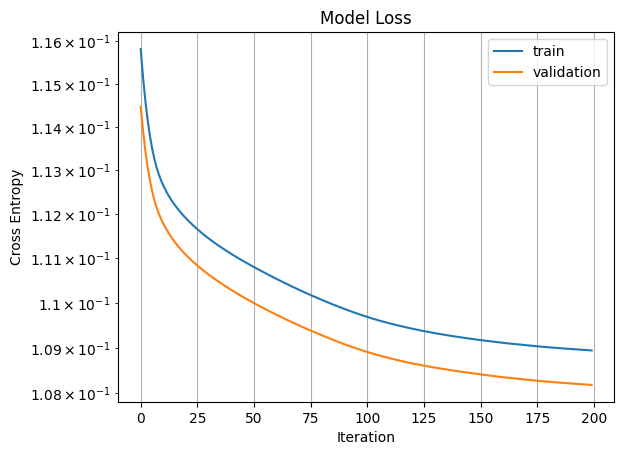

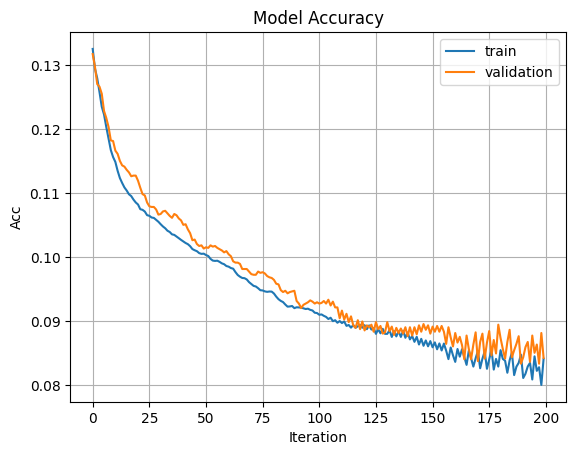

In [62]:
# vizualize mnist

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## 4.
Pamėginti MNIST duomenims gauti kuo didesnį tikslumą.

In [ ]:
# train mnist

mnist = tf.keras.datasets.mnist
(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

test_images  = test_images0.reshape(10000, 784)
train_images = train_images0.reshape(60000, 784)

test_images  = test_images/255.0
train_images = train_images/255.0

keras_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax')
])

keras_model.build(input_shape=[None,784])

keras_model.summary()

keras_model.compile(
    optimizer=tf.keras.optimizers.SGD(0.4, use_ema=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=len(train_images),
    epochs=300,
    validation_data=(test_images, test_labels0),
)


Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


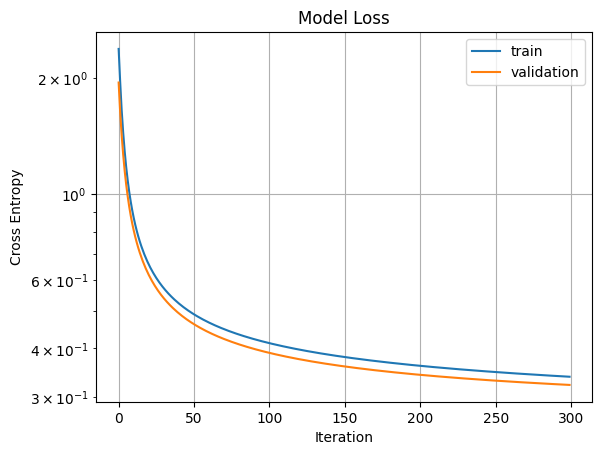

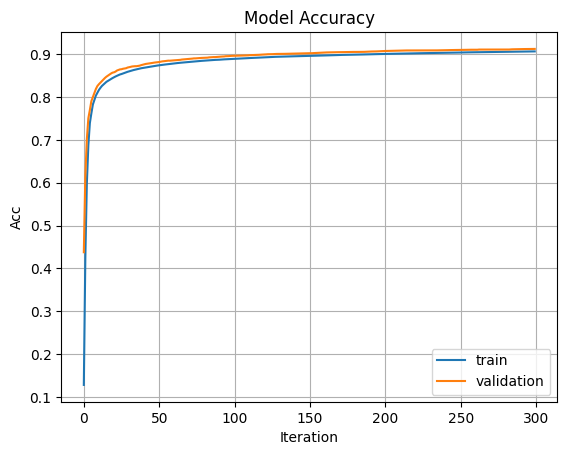

In [60]:
# vizualize mnist

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## 5.
Rasti internete duomenų rinkinį su vaizdais ir pritaikyti turimą kodą.

In [81]:
# load datasets

# https://www.kaggle.com/datasets/zalando-research/fashionmnist
train_dataset = pd.read_csv('assets/fashion-mnist_train.csv', skiprows = [0], header=None).values
train_input = train_dataset[:, 1:]
train_label = train_dataset[:, :1]

test_dataset = pd.read_csv('assets/fashion-mnist_test.csv', skiprows = [0], header=None).values
test_input = test_dataset[:, 1:]
test_label = test_dataset[:, :1]


In [88]:
k_l2=0
keras_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(20, activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2)),
    #tf.keras.layers.Dense(20, activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(k_l2))
])

keras_model.build(input_shape=[None, 784])
keras_model.summary()

keras_model.compile(
    optimizer=tf.keras.optimizers.Adam(), # Optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function to minimize
    metrics=[keras.metrics.SparseCategoricalAccuracy()] # List of metrics to monitor
)

history = keras_model.fit(
    train_input,
    train_label,
    batch_size=len(train_input),
    epochs=300,
    validation_data=(test_input, test_label)
)


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
1/1 [==============================] - 11s 11s/step - loss: 200.8899 - sparse_categorical_accuracy: 0.0993 - val_loss: 135.2529 - val_sparse_categorical_accuracy: 0.1143
Epoch 2/300
1/1 [==============================] - 0s 393ms/step - loss: 136.3396 - sparse_categorical_accuracy: 0.1098 - val_loss: 113.3213 - val_sparse_categorical_accuracy: 0.1422
Epoch 3/300
1/1 [==============================] - 0s 212ms/step - loss: 114.0896 - sparse_categorical_accuracy: 0.1405 - val_loss: 104.0747 - val_sparse_categorical_accuracy: 0.1805

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


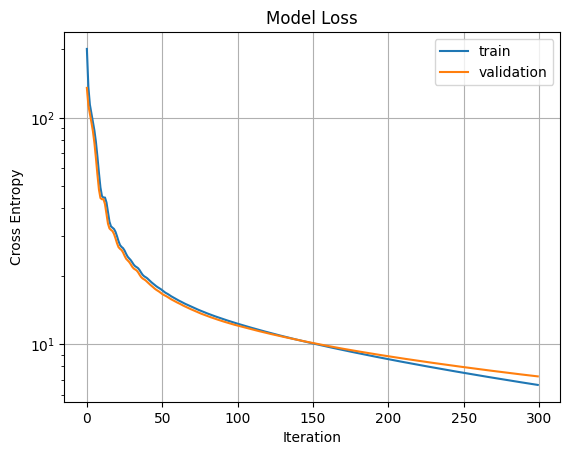

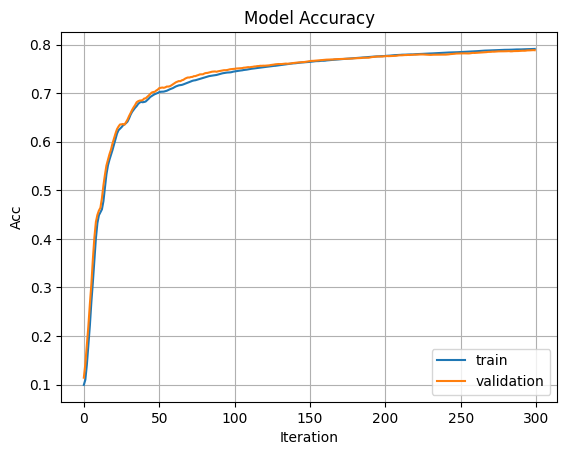

In [90]:
# vizualize

for item in history.history:
    print("Key:",item)

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()